# City Bikes Project
### Investigated By Adeleke Adekola Emmanuel

### FELLOW ID: FE/23/99408364
### PLATFORM: 3MTT, GOMYCODE, ALT SCHOOL
### PROGRAMME: Data Science
### DATA SOURCE: https://api.citybik.es/v2/

### Table of Contents
<ul
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Data Assesment Outcome">Data Assesment Outcome</a></li>
<li><a href="#Data Cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction 📚
Today, the term 'City Bike' is still used to describe a bicycle that is designed for urban use. The term is now used to describe a wide range of bicycles, from practical, everyday commuters to stylish, single-speed bikes.

This project focuses on analyzing city bike Names in different cities. This project aims to provide valuable insights that can help the company develop targeted customer retention strategies.

## Dataset Description
The dataset used in this analysis was extracted using API from : https://api.citybik.es/v2/ as JSON and read to pandas DataFrame.

## Questions For Analysis
1. Country with highest and lowest bikes
2. City bike distribution
3. Country distribution
4. Bike Name distribution
5. City Bike with highest count
6. Find the mean, median, mode, and standard deviation for Bike Name,Country, and City.

In [1]:
#import libraries i'll be using
import pandas as pd
import requests
import json
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

<a id='wrangling'></a>
# Data Wrangling


### Preliminary Wrangling
General Properties
First, the data is read from  https://api.citybik.es/v2/ using API and the first five rows are illustrated.

In [2]:
url = 'http://api.citybik.es/v2/networks'

In [3]:
response = requests.get(url).json()

In [4]:
print(response)

{'networks': [{'company': ['ЗАО «СитиБайк»'], 'href': '/v2/networks/velobike-moscow', 'id': 'velobike-moscow', 'location': {'city': 'Moscow', 'country': 'RU', 'latitude': 55.75, 'longitude': 37.616667}, 'name': 'Velobike'}, {'company': ['Comunicare S.r.l.'], 'href': '/v2/networks/bicincitta-siena', 'id': 'bicincitta-siena', 'location': {'city': 'Siena', 'country': 'IT', 'latitude': 43.3186, 'longitude': 11.3306}, 'name': 'Bicincittà', 'source': 'https://www.bicincitta.com/frmLeStazioni.aspx?ID=202'}, {'company': ['Cyclopolis Systems'], 'href': '/v2/networks/cyclopolis-maroussi', 'id': 'cyclopolis-maroussi', 'location': {'city': 'Maroussi', 'country': 'GR', 'latitude': 38.0568722388, 'longitude': 23.8083299536}, 'name': 'Cyclopolis'}, {'company': ['Cyclopolis Systems'], 'href': '/v2/networks/cyclopolis-nafplio', 'id': 'cyclopolis-nafplio', 'location': {'city': 'Nafplio', 'country': 'GR', 'latitude': 37.5639397319, 'longitude': 22.8093402872}, 'name': 'Cyclopolis'}, {'company': ['Comunic

In [5]:
response['networks'][0]['company']

['ЗАО «СитиБайк»']

In [6]:
response['networks'][0]['location']['city']

'Moscow'

In [7]:
response['networks'][0]['location']['country']

'RU'

In [8]:
response['networks'][0]['location']['latitude']

55.75

In [9]:
response['networks'][0]['location']['longitude']

37.616667

In [10]:
len(response['networks'])

770

In [11]:
networks = response['networks']

In [12]:
data = pd.DataFrame()


for network in networks:
    print(network['name'])

Velobike
Bicincittà
Cyclopolis
Cyclopolis
Bicincittà
Cyclopolis
Cyclopolis
Bicincittà
Cyclopolis
Cyclopolis
Cyclopolis
Cyclopolis
Bicincittà
Cyclopolis
Cyclopolis
Bicincittà
Cyclopolis
Bicincittà
Bicincittà
Bicincittà
TFI Bikes
TFI Bikes
Pun Pun Bike Share
TFI Bikes
Bicincittà
Bydgoski rower aglomeracyjny
Santander Cycles
WE-cycle
Bicincittà
StadtRAD Hamburg'
Tigullionbike
ARbike
Velobike
Vélib' Métropole
Ascoli Piceno
BiGi
Girocleta
Alba
BikeMi
Biella
Chivasso
Bizi
EcoBici
Bici in Busto
Velo Antwerpen
Cuneo
Malmö by bike
BiciMAD
EasyBike
FRee Bike sharing
EasyBike
EasyBike
lecce
EasyBike
EasyBike
Manerba in Bici
EasyBike
EasyBike
EasyBike
Mar e Bici
EasyBike
EasyBike
Novara
EasyBike
EasyBike
ThessBike
AthensBikes
GoodBike
Bicicoruña
BiciFerrolTerra
Mi Muovo in Bici
Bixi
Mi Muovo in Bici
Bike Share Toronto
SoBi
Pavia in bici
Bici Perugia
ATX MetroBike
Bike Chattanooga
Mi Muovo in Bici
Pinerolo
BIKETOWN
Mi Muovo in Bici
Boulder BCycle
Mi Muovo in Bici
Broward BCycle
Bublr Bikes
Reddy Bi

In [13]:
for network in networks:
    print(network['company'])

['ЗАО «СитиБайк»']
['Comunicare S.r.l.']
['Cyclopolis Systems']
['Cyclopolis Systems']
['Comunicare S.r.l.']
['Cyclopolis Systems']
['Cyclopolis Systems']
['Comunicare S.r.l.']
['Cyclopolis Systems']
['Cyclopolis Systems']
['Cyclopolis Systems']
['Cyclopolis Systems']
['Comunicare S.r.l.']
['Cyclopolis Systems']
['Cyclopolis Systems']
['Comunicare S.r.l.']
['Cyclopolis Systems']
['Comunicare S.r.l.']
['Comunicare S.r.l.']
['Comunicare S.r.l.']
['The National Transport Authority']
['The National Transport Authority']
['BTS Group Holdings']
['The National Transport Authority']
['Comunicare S.r.l.']
['Bike U Sp. z o.o.']
['PBSC', 'Serco Group plc']
['PBSC', 'Alta Bicycle Share, Inc']
['Comunicare S.r.l.']
['Transparenzportal Hamburg']
['Comunicare S.r.l.']
['Comunicare S.r.l.']
['Velobike.kz, LLP', 'Smoove']
['Smovengo']
['Comunicare S.r.l.']
['Comunicare S.r.l.']
['ICNITA S.L.']
['Comunicare S.r.l.']
['IGP S.p.A.']
['Comunicare S.r.l.']
['Comunicare S.r.l.']
['ClearChannel']
['5M2 S.A. D

In [14]:
for network in networks:
    print(network['href'])

/v2/networks/velobike-moscow
/v2/networks/bicincitta-siena
/v2/networks/cyclopolis-maroussi
/v2/networks/cyclopolis-nafplio
/v2/networks/bicincitta-parco-dei-colli-di-bergamo
/v2/networks/cyclopolis-aigialeia
/v2/networks/cyclopolis-marathon
/v2/networks/bicincitta-mantova
/v2/networks/cyclopolis-neasmyrni
/v2/networks/cyclopolis-moschatotavros
/v2/networks/cyclopolis-arxaiaolympia
/v2/networks/cyclopolis-kiato
/v2/networks/bicincitta-assemini
/v2/networks/cyclopolis-rhodes
/v2/networks/cyclopolis-florina
/v2/networks/bicincitta-tortoli
/v2/networks/cyclopolis-limnos
/v2/networks/bicincitta-gaeta
/v2/networks/bicincitta-borgarello
/v2/networks/bicincitta-pizzighettone-formigara
/v2/networks/cork
/v2/networks/limerick
/v2/networks/punpunbikeshare
/v2/networks/galway
/v2/networks/bicincitta-montecatini-terme
/v2/networks/bikeu-bra
/v2/networks/santander-cycles
/v2/networks/we-cycle
/v2/networks/bicincitta-carrara
/v2/networks/stadtrad-hamburg
/v2/networks/tigullionbike
/v2/networks/arbik

In [39]:
df = pd.DataFrame()

for i in range (len(response['networks'])):
    temp = pd.DataFrame(
        {
        'Name': [response['networks'][i]['name']],
        'Country': [response['networks'][i]['location']['country']],
        'City': [response['networks'][i]['location']['city']],
        'Latitude': [response['networks'][i]['location']['latitude']],
        'Longitude':[response['networks'][i]['location']['longitude']]
        }
    )
    
    df =pd.concat([df,temp], ignore_index= True)
df.head()

,Name,Country,City,Latitude,Longitude
0,Velobike,RU,Moscow,55.750000,37.616667
1,Bicincittà,IT,Siena,43.318600,11.330600
2,Cyclopolis,GR,Maroussi,38.056872,23.808330
3,Cyclopolis,GR,Nafplio,37.563940,22.809340
4,Bicincittà,IT,Parco dei Colli di Bergamo,45.722956,9.649230


# Checking for the data properties

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       770 non-null    object 
 1   Country    770 non-null    object 
 2   City       770 non-null    object 
 3   Latitude   770 non-null    float64
 4   Longitude  770 non-null    float64
dtypes: float64(2), object(3)
memory usage: 30.2+ KB


In [41]:
df.describe()

,Latitude,Longitude
count,770.000000,770.000000
mean,41.548305,9.423147
std,14.194915,51.541593
min,-43.534100,-157.856000
25%,39.269965,-0.390547
50%,44.647080,9.175448
75%,49.277725,17.040975
max,68.968000,174.763000


In [42]:
citymap = df['City'].unique()

In [43]:
import seaborn as sns

In [44]:
len(df['City'].unique())

750

In [45]:
df.head(100)

,Name,Country,City,Latitude,Longitude
0,Velobike,RU,Moscow,55.750000,37.616667
1,Bicincittà,IT,Siena,43.318600,11.330600
2,Cyclopolis,GR,Maroussi,38.056872,23.808330
3,Cyclopolis,GR,Nafplio,37.563940,22.809340
4,Bicincittà,IT,Parco dei Colli di Bergamo,45.722956,9.649230
...,...,...,...,...,...
95,CoGo,US,"Columbus, OH",39.983333,-82.983333
96,Lyft,US,"Denver, CO",39.720550,-104.952530
97,Divvy,US,"Chicago, IL",41.878114,-87.629798
98,Tirano in Bici,IT,Tirano,46.216168,10.169606


In [60]:
df['Country'].unique()

array(['RU', 'IT', 'GR', 'IE', 'TH', 'PL', 'GB', 'US', 'DE', 'KZ', 'FR',
       'ES', 'MX', 'BE', 'SE', 'CA', 'BR', 'CL', 'NO', 'AR', 'PT', 'LU',
       'SI', 'LT', 'JP', 'RO', 'TR', 'FI', 'IL', 'SK', 'NL', 'CO', 'GE',
       'ME', 'AT', 'CH', 'LV', 'CY', 'NZ', 'HR', 'UA', 'MT', 'BA', 'HU',
       'MC', 'CZ', 'EC', 'PE', 'KR', 'AE', 'SA', 'TW', 'AW', 'CN', 'CR',
       'IN', 'MY'], dtype=object)

In [ ]:
# # Country Abbr and the full names
Abbreviation	Country Name  
RU	Russia 
IT	Italy  
GR	Greece  
IE	Ireland  
TH	Thailand  
PL	Poland  
GB	Great Britain (or United Kingdom)  
US	United States of America  
DE	Germany  
KZ	Kazakhstan  
FR	France 
ES	Spain  
MX	Mexico  
BE	Belgium  
SE	Sweden  
CA	Canada  
BR	Brazil  
CL	Chile  
NO	Norway  
AR	Argentina  
PT	Portugal  
LU	Luxembourg  
SI	Slovenia  
LT	Lithuania   
JP	Japan   
RO	Romania   
TR	Turkey   
FI	Finland   
IL	Israel     
SK	Slovakia   
NL	Netherlands  
CO	Colombia   
GE	Georgia   
ME	Montenegro  
AT	Austria   
CH	Switzerland  
LV	Latvia  
CY	Cyprus  
NZ	New Zealand  
HR	Croatia  
UA	Ukraine  
MT	Malta  
BA	Bosnia and Herzegovina   
HU	Hungary   
MC	Monaco  
CZ	Czech Republic    
EC	Ecuador  
PE	Peru  
KR	South Korea  
AE	United Arab Emirates  
SA	Saudi Arabia  
TW	Taiwan  
AW	Aruba 
CN	China  
CR	Costa Rica  
IN	India  
MY	Malaysia  

In [61]:
len(df['Name'].unique())

528

In [82]:
df.Name.value_counts()

Nextbike              57
Bicincittà            41
Cyclopolis            16
VRN                   14
YouBike               13
                      ..
FRee Bike sharing      1
HELLO CYCLING Nara     1
Costa Blu              1
OV-fiets               1
BiciMAD                1
Name: Name, Length: 528, dtype: int64

In [48]:
df['Name'].nunique()

528

In [49]:
min((df['Country']=='GR') == True)

False

In [57]:
df.value_counts()

Name                             Country  City            Latitude   Longitude 
ARVAL                            IT       Scandicci       43.770100   11.15920     1
StadtRAD Hamburg                 DE       Hamburg         53.550308   10.00063     1
PisTA!                           IT       Taranto         40.435100   17.20960     1
Pobiedziski Rower Gminny Poland  PL       Pobiedziska     52.476500   17.28660     1
Pogoh                            US       Pittsburgh, PA  40.440600  -79.98930     1
                                                                                  ..
Docomo Bike Share Okinawa        JP       沖縄県 (Okinawa)   26.209700   127.68410    1
Docomo Bike Share Osaka          JP       大阪府 (Osaka)     34.693000   135.50280    1
Docomo Bike Share Shiga          JP       滋賀県 (Shiga)     35.037800   135.98010    1
Docomo Bike Share Tokyo          JP       Tokyo           35.682700   139.76600    1
어울링 (Eoulling)                   KR       세종 (Sejong)     36.490100   

In [26]:
co = df['Country'].unique()
len(co)

57

In [29]:
df.isna().sum()

Name         0
Company      0
Country      0
City         0
Latitude     0
Longitude    0
dtype: int64

<a id='Data Assesment Outcome'></a>
### Data Assesment Outcome
##### Quality Issues
In our data wrangling, we discovered we have no issue with the data extracted from https://api.citybik.es/v2/ 

<a id='Data Cleaning'></a>
## Data Cleaning & PCA
The programmatic data cleaning process:  

Define   
Code   
Test   

In this dataset extracted, there is no data cleaning to be done.


In [30]:
#A copy of the extracted dataset
df1 = df.copy()

<a id='eda'></a>
## Exploratory Data Analysis
> Here I'll perform some analysis on the cleaned data, using statistical computation and different visualizations to represent my findings.

#### EDA Questions
1. Country with highest and lowest bikes
2. City bike distribution
3. Country distribution
4. Bike Name distribution
5. City Bike with highest count
6. Find the mean, median, mode, and standard deviation for Bike Name,Country, and City.

# Question 1
Country with the highest and lowest bikes

In [119]:
(df1.groupby(['Country'])['Country'].count()).sort_values(ascending=False)

Country
IT    129
DE     87
ES     66
FR     61
US     59
JP     43
GR     30
GB     29
CZ     27
HR     26
CH     22
PL     22
AT     18
BR     14
TW     12
IN      8
SI      8
RO      6
NO      6
CA      6
MX      5
SK      5
PT      5
IE      5
CN      5
CY      4
TR      4
AR      4
UA      4
KR      4
BE      4
RU      3
SE      3
KZ      3
BA      3
AE      2
MT      2
LU      2
CO      2
NL      2
NZ      2
EC      2
FI      2
SA      1
CL      1
CR      1
TH      1
AW      1
LV      1
GE      1
MC      1
IL      1
PE      1
LT      1
MY      1
ME      1
HU      1
Name: Country, dtype: int64

### This shows IT (Italy) has the highest City Bikes (129), also it shows SA,CL,CR,TH,AW,LV,GE,MC,IL,PE,LT,MY,ME, and HU are the Countries with the lowest.
  

# Question 2
City Distribution

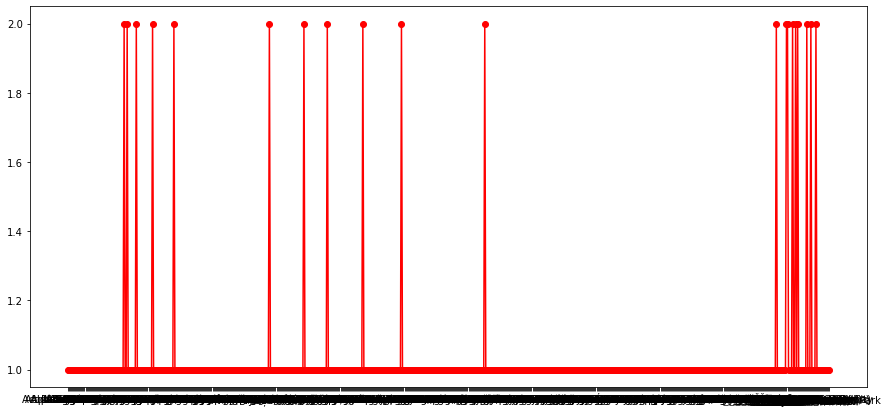

In [96]:
City_Count = df1.groupby(['City'])['City'].count()
plt.figure(figsize=(15, 7))
plt.plot(City_Count, marker='o', linestyle='-', color='red')

In [142]:
(df1.groupby(['City'])['City'].count()).sort_values(ascending=False)

City
Frankfurt           2
神奈川県 (Kanagawa)     2
愛知県 (Aichi)         2
広島県 (Hiroshima)     2
Nicosia             2
                   ..
Imola               1
Indianapolis, IN    1
Innsbruck           1
Inverness           1
창원시 (Changwon)      1
Name: City, Length: 750, dtype: int64

###  No city has more than 2 Bikes

# Question 3
Country Distribution

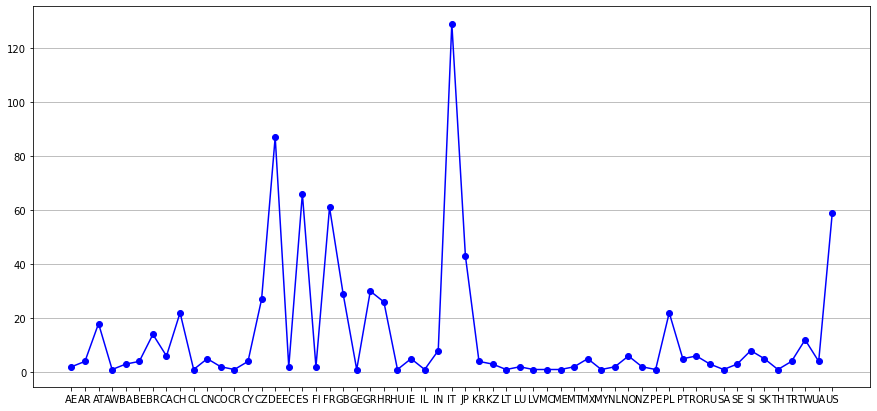

In [134]:
#Using a line chart
plt.figure(figsize=(15, 7))
plt.plot(Country_Count, marker='o', linestyle='-', color='blue')
plt.grid(axis='y')

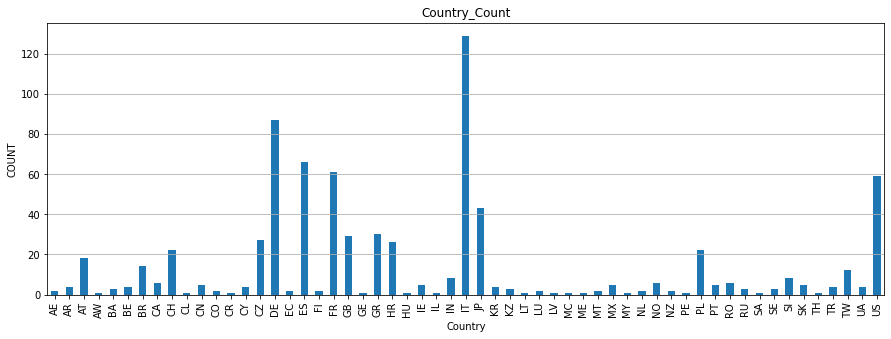

In [103]:
#Using a bar chart
plt.figure(figsize=(15, 5))

Country_Count = df1.groupby(['Country'])['Country'].count()
Country_Count.plot(kind='bar')
plt.title("Country_Count")
plt.xlabel("Country")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

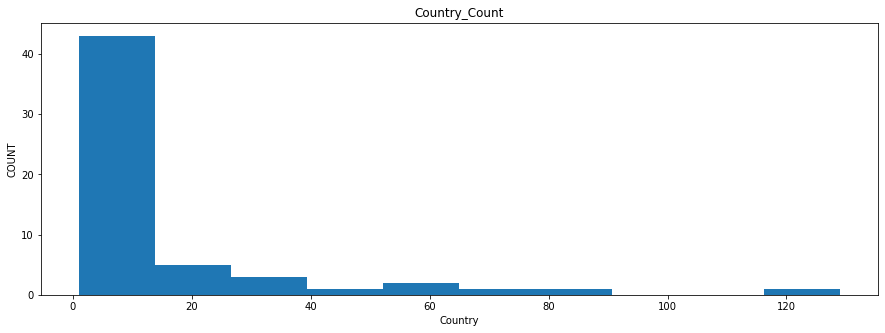

In [58]:
#Using Histogram
plt.figure(figsize=(15, 5))

Country_Count = df1.groupby(['Country'])['Country'].count()
Country_Count.plot(kind='hist')
plt.title("Country_Count")
plt.xlabel("Country")
plt.ylabel("COUNT")
plt.show()

# Question 4
Bike Name distribution

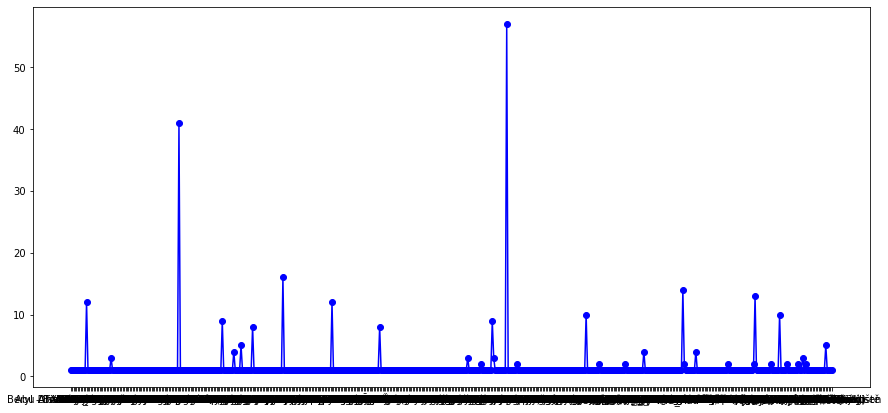

In [94]:
plt.figure(figsize=(15, 7))
plt.plot(Name_Count, marker='o', linestyle='-', color='blue')

# Question 5
City Bike with highest count

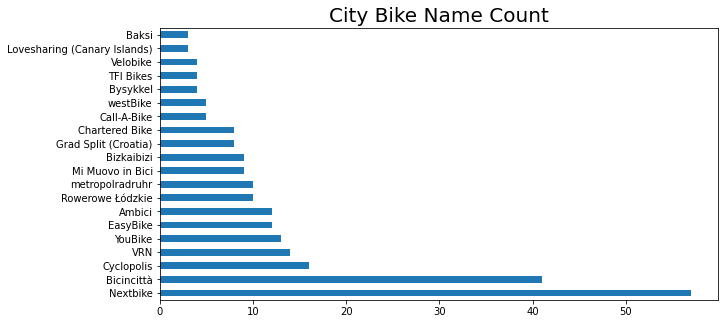

In [135]:
plt.figure(figsize=(10,5))
plt.title('City Bike Name Count', fontsize=20, color='black')
plt.grid(axis='x')
df1.Name.value_counts(ascending=False).head(20).plot.barh();

### This shows Nextbike has the highest count for City Bike, followed by Bicincitta.

# Question 6
Find the mean, median, mode, and standard deviation for Bike Name,Country, and City.

In [120]:
#For country mean
(df1.groupby(['Country'])['Country'].count()).mean()

13.508771929824562

In [121]:
#For country mode
(df1.groupby(['Country'])['Country'].count()).mode()

0    1
dtype: int64

In [122]:
#For country median
(df1.groupby(['Country'])['Country'].count()).median()

4.0

In [138]:
#For country Standard Deviation
(df1.groupby(['Country'])['Country'].count()).std()

24.102550848270884

In [123]:
#For city mean
(df1.groupby(['City'])['City'].count()).mean()

1.0266666666666666

In [124]:
#For city mode
(df1.groupby(['City'])['City'].count()).mode()

0    1
dtype: int64

In [125]:
#For city median
(df1.groupby(['City'])['City'].count()).median()

1.0

In [137]:
#For city Standard Deviation
(df1.groupby(['City'])['City'].count()).std()

0.16121479202535663

In [126]:
#For Bike Name mean
(df1.groupby(['Name'])['Name'].count()).mean()

1.4583333333333333

In [127]:
#For Bike Name mode
(df1.groupby(['Name'])['Name'].count()).mode()

0    1
dtype: int64

In [128]:
#For Bike Name median
(df1.groupby(['Name'])['Name'].count()).median()

1.0

In [132]:
#For Bike Name Standard Deviation
(df1.groupby(['Name'])['Name'].count()).std()

3.340023330865714

<a id='conclusions'></a>
# Conclusions

I have been able to extract some information from this data, such as;  
1. IT (Italy) has the highest City Bikes (129), also it shows SA,CL,CR,TH,AW,LV,GE,MC,IL,PE,LT,MY,ME, and HU are the Countries with the lowest.  
2. Nextbike has the highest count for City Bike, followed by Bicincitta.  
3. No city has more than 2 Bikes  

In [143]:
#Downloading the extracted dataset for future use.
df1.to_csv('city_bike.csv', index=False)
print('File Downloaded successfully!')

File Downloaded successfully!
